# How to plot map data

The lab computers already have matplotlib's Basemap library installed. If you want to install it on your own personal computer, go to your terminal and type the command 

`conda install basemap`

and import it as shown below. The file `python_maps.py` in the repo does all of this stuff we are doing below but in two nice functions, `get_data( )` and `plot_the_world( )`. I will demonstrate this at the end of this notebook.

In [98]:
import pandas as pd
import numpy as np
import json
import python_maps
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [99]:
def get_data():
    """
    Gets water usage data for Los Angeles.
    We are most interested in latitude and longitude.
    The data is stored in a pandas dataframe.
    """
    web_address = "https://data.lacity.org/resource/v87k-wgde.json"
    df = pd.read_json(web_address)

    # the data is pretty messy
    # this code gets rid of everything we want
    df.drop(df.columns[:13],axis=1,inplace=True)
    J = json.loads(df['location_1'].to_json())
    df.drop(df.columns[-2:],axis=1,inplace=True)
    
    # the column of gps coordinates contains json data
    # this gets the gps coordinates from that column
    gps1 = []
    gps2 = []
    for j in range(len(J.keys())):
        gps1.append(J[str(j)]['coordinates'][0])
        gps2.append(J[str(j)]['coordinates'][1])
    # make longitude and latitude columns
    df['lon'] = gps1
    df['lat'] = gps2
    return df

Here is what the data look like:

In [100]:
data = get_data()
data.head()

,fy_12_13,lon,lat
0,16,-118.435218,34.305143
1,12,-118.597587,34.218673
2,36,-118.662827,34.143274
3,24,-118.535727,34.048862
4,26,-118.516296,34.166733


Create a matplotlib Basemap object. There are lots of map projections you can use. The code below uses a flat earth projection called the mercator projection. Feel free to substitute this with something else like 'robin' for the robinson projection. An overview of the keyword arguments used below:

+ lat_0,lon_0: the latitude and longitude to use as the center of the map
+ resolution: high or low depending on how detailed you want the map to be
+ area_thresh: used to stop matplotlib from plotting tiny lakes and stuff
+ llcrnrlon: lower left corner longitude of the map
+ llcrnrlat: lower left corner latitude of the map
+ urcrnrlon: upper right corner longitude of the map
+ urcrnrlat: upper right corner latitude of the map

If you are using `%matplotlib inline`, you need to run all of the code at the same time. See the comments below. Documentation [here](http://matplotlib.org/basemap/api/basemap_api.html) or [here](http://matplotlib.org/basemap/).

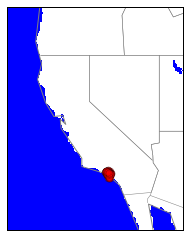

In [101]:
my_map = Basemap(projection='merc',lat_0=34.0522,lon_0=-118.2437,resolution='c',
        llcrnrlon=-127.,llcrnrlat=30,urcrnrlon=-112., urcrnrlat=45)

"""
This will create a map centered on California. But now you have to draw stuff on it.
"""

#it's pretty self-explanatory
my_map.drawcoastlines(color='grey')
my_map.drawcountries(color='grey')
my_map.drawstates(color='grey')

"""
Now put colors for the land and sea. I chose to go with white because it looks best when you plot points.
"""

my_map.drawlsmask(land_color='white',ocean_color='blue')

"""
Now let's actually plot our data points. Throw in the dataframe created above.
Basemap will automatically convert the latitudes and longitudes
to fit the projection of the map. Take a look at the map!
"""

x,y = my_map(np.array(data['lon']),np.array(data['lat']))
# scatter plot with constant bubble size
my_map.plot(x,y,'ro',markersize=7,alpha=.4,linewidth=0)
plt.show()

Wow. So wow. Very map. Look at the `python_maps.py` code for a not notebook version of this. Here are some other things to look at.

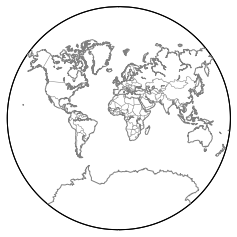

In [102]:
# fills everything with just one color
# van der Grinten projection
my_map = Basemap(projection='vandg',lat_0=0,lon_0=0,resolution='c')
my_map.drawcoastlines(color='grey')
my_map.drawcountries(color='grey')
my_map.drawmapboundary(fill_color='white')
plt.show()

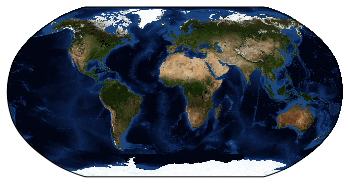

In [103]:
# uses NASA image for earth
# bluemarble only works in certain projections
my_map = Basemap(projection='robin',lat_0=0,lon_0=0,resolution=None)
my_map.bluemarble()
plt.show()

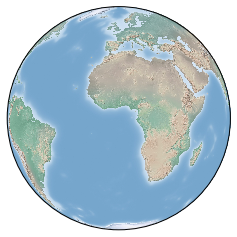

In [104]:
# ortho projection with shadedrelief
my_map = Basemap(projection='ortho',lat_0=0,lon_0=0,resolution='c')
my_map.shadedrelief()
plt.show()

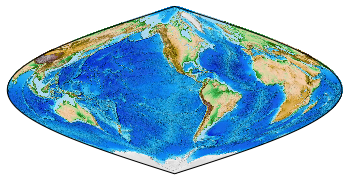

In [105]:
# shows topography on the sinu projection
my_map = Basemap(projection='sinu',lat_0=50,lon_0=-107,resolution='c',lat_1=-50.,lat_2=50)
my_map.etopo()
plt.show()

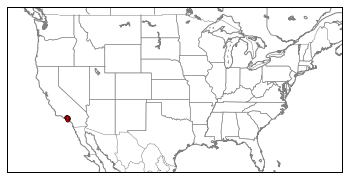

In [106]:
# this comes from python_maps.py in the repo
# it plots a map of the USA
df = python_maps.get_data()
python_maps.plot_the_world(df)

For more information and examples, see [here](http://matplotlib.org/basemap/users/examples.html).